Consider a Freely Jointed Chain in 3 dimensions (no bending energy, just entropy) in the large N limit (N is the number of monomers). We are going to describe the last stages of the process of DNA rewinding since we are going to constrain the volume spanned by the polimer to the one of the Capside and we are going to consider a long enough polymer. 

For a FJC in 3D the distribution of end to end displacement: 

$$p_N(R) = \left(\frac{3}{2\pi N}\right)^{3/2} \frac{4\pi R^2}{l^3} \exp{\left(-\frac{3 R^2}{2 N l^2}\right)}$$

$l$ is the kuhn length that we are going to fit.

The total number of configurations of the chain (walks of N steps) with an end to end length between R and R+dR is: 

$$n(R) dR = \mathcal{N} p_N(R) dR$$

We are going to consider an excluded volume $v$ and a total volume $V \propto R^3$ and use mean field Flory theory to compute $\mathcal{N}$:


$$ \mathcal{N} = C(C-1)^{N-1} \chi $$

With $C=6$ in 3D and: 

$$\chi = \prod_{k=1}^{N-1}\left(1-k \frac{v}{V}\right) = \left(\frac{v}{V}\right)^{N} \frac{\left(\frac{V}{v}\right) !}{\left(\frac{V}{v}-N\right) !}$$

$V/v$ is a large quantity, so let's use Stirling approx:

$$ \ln \chi \sim -N+\left(\frac{V}{v}-N\right)\left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-N\right)\right] $$

Now we are ready to compute the (constrained) entropy and the free-energy of the system: 


$$S(R) = k_B \log{n(R)}$$
$$F(R) = -k_B T \log{n(R)}$$

Or in terms of the volume $V$ neglecting terms constant in $V$, $l$ and $N$: 

$$F(V) \propto k_B T \left\{ N [1 -\log{(C-1)}] - \left(\frac{V}{v}-N\right) \left[\log{\frac{V}{v}}- \log\left({\frac{V}{v}-N}\right)\right] - \log{\left[ \left(\frac{1}{N}\right)^{3/2} \left(\frac{V^{2/3}}{l^2}\right)  \right]}  +  \frac{3 (4\pi)^{-2/3}}{2 N l^2} V^{2/3} \right\} $$ 

Then we can compute the pressure as: 

$$ P = \left. -\left( \frac{\partial F}{\partial P}  \right) \right|_{T,N} \propto k_{B} T \left\{ \frac{1}{v} \log{\frac{1}{1-(N v)/ V}} + \frac{1}{V} \left(\frac{2}{3} - N\right)  - \frac{1}{N (4\pi)^{2/3} l^2} V^{-1/3}  \right\} $$


And the force exerted by the motor will be proportional to the pressure.

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit 
from numpy import log

In [2]:
x = np.array([30.37292789969,31.99187600139,33.6108241031,
              35.22977220481,36.84872030651,38.46766840822,
              40.65324834552,42.27219644723,43.89114454894,
              45.51009265064,47.12904075235,48.74798885406,50.36693695576,
              51.98588505747,53.60483315918,55.22378126088,
              56.84272936259,58.4616774643,60.080625566,
              61.69957366771,63.31852176942,64.93746987113,
              66.55641797283,68.17536607454,69.79431417625,
              71.41326227795,73.03221037966,74.65115848137,
              76.27010658307,77.88905468478,79.50800278649,
              81.12695088819,82.7458989899,84.36484709161,
              85.98379519331,87.60274329502,89.22169139673,
              90.84063949843,92.45958760014,94.07853570185,
              95.69748380355,97.31643190526,98.93538000697,
              100.5543281087,102.1732762104,103.7922243121])


y = np.array([-0.5429885000496,-0.6086670962625,-0.1817562208784,
              0.01527956776048,0.01527956776048,-0.08323832655894,
              -0.08323832655894,0.1137974620799,0.4093511450382,
              1.033297809061,1.263172895806,1.460208684445,
              1.624405174978,1.952798156042,2.576744820065,
              3.200691484088,3.726120253792,4.842656389412,
              6.057710419352,7.502639536036,8.750532864082,
              9.867068999703,11.27915881828,13.15099881035,
              16.00801774561,18.17541142064,19.94873351839,
              21.49218052939,22.70723455933,24.11932437791,
              25.89264647566,28.15855804501,30.6543447011,
              33.47852433826,36.99232923565,39.84934817091,
              42.11525974026,43.92142113612,45.46486814712,
              46.81127936949,47.92781550511,48.88015515019,
              49.79965549717,50.52212005552,51.34310250818,
              51.9670491722])


In [10]:
def Force(x,k,v,l):
    N = 19000
    R = 20
    
    n = x*N/100
    V = 4/3*pi*(R**3)
    return k * (  1/v * log(1/(1-n*v/V)) + 1/ V * (2/3-n) - 1/(n*(4*pi)**(2/3)*l**2) * V**(-1/3) ) 

In [21]:
popt, pcov = curve_fit(Force,x,y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


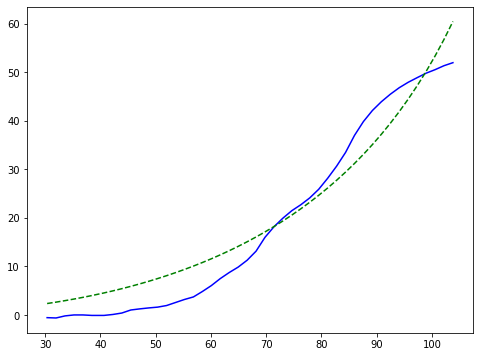

In [22]:
plt.figure(figsize = (8,6))
ax = plt.gca()
ax.plot(x, y, 'b-')
ax.plot(x,Force(x,*popt), 'g--')

In [23]:
popt

array([9.67119816e+01, 1.38143839e+00, 4.96902904e+04])